<a href="https://colab.research.google.com/github/SanjnaCodes/sanjana/blob/main/PredictHeartAttack_DTRFNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I performed classification on a dataset to predict heart attack possibility (dataset link: https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility).
I utilized Decision Tree, Random Forest, and Naive Bayes classification models.
Hyperparameter tuning using grid search and feature selection using Sequential Forward Selection was performed on each classification method.
ROC curve and AUC score were calculated for each method.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import collections
import random
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import  ExtraTreesClassifier

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif



from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

from sklearn import metrics
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
random_state = 0

In [ ]:
def roc (actual, prob):
    FPR, TPR, threshold = metrics.roc_curve(actual, prob, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, prob)
    plt.plot(FPR, TPR, label = 'ROC curve (area = %0.2f)' %auc_score)
    plt.legend(loc = 'lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.show()
    return None

In [ ]:
training_dataset = pd.read_csv("/content/data.csv") #reading the csv file and storing it as data
data = training_dataset.copy()
data.head(10)            #showing the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Checking for unique values of each column
for column in data.columns:
    print(column)
    print(data[column].unique())
    print('\n')

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


sex
[1 0]


cp
[3 2 1 0]


trestbps
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


chol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]


fbs
[

In [ ]:
# One-hot encoding using get dummies method
df = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
#output
y= data.target
 
#input
x=data.drop('target',axis=1)
 
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state = 0)
 
#printing shapes of testing and training sets :
print("shape of original dataset :", data.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (303, 14)
shape of input - training set (242, 13)
shape of output - training set (242,)
shape of input - testing set (61, 13)
shape of output - testing set (61,)


Mean accuracy:  0.7399659863945578


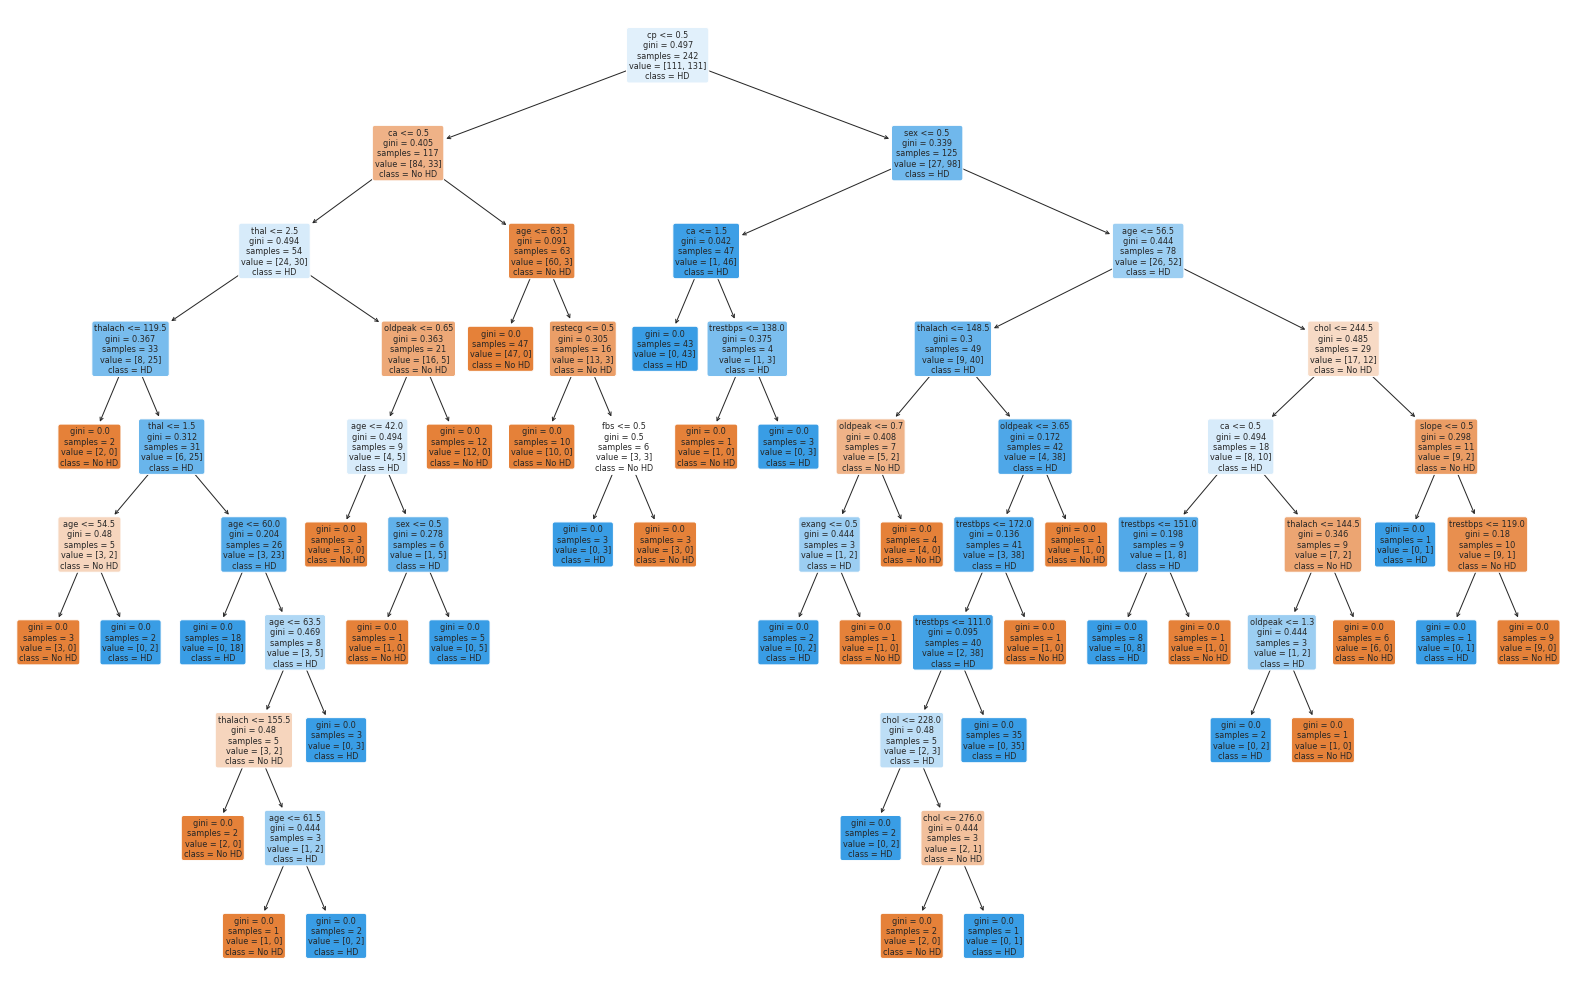

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Cross validation
dt_accuracy = np.mean(cross_val_score(dt, x_train, y_train, cv=5, scoring='accuracy'))
print("Mean accuracy: ", dt_accuracy)

# Plotting the tree
plt.figure(figsize=(28, 18))
plot_tree(dt, filled=True, rounded=True, class_names=['No HD', 'HD'], feature_names=x.columns);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


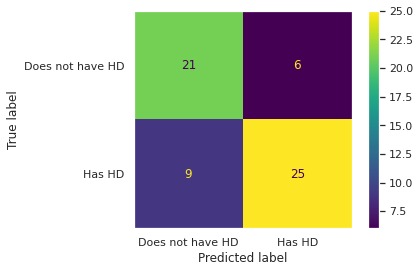

In [ ]:
# Confusion matrix
plot_confusion_matrix(dt, x_test, y_test, display_labels=['Does not have HD', 'Has HD'])
plt.grid(False)

In [ ]:
# Overall accuracy of the pruned tree
dt.score(x_test, y_test)

0.7540983606557377

In [ ]:
pred_model = dt.predict(x_test)

con_matr = confusion_matrix(pred_model, y_test)
print("Printing the Confusion Matrix")
print(con_matr)
print("\n")
print(f'Accuracy of confusion matrix: {accuracy_score(pred_model, y_test)*100} %')

Printing the Confusion Matrix
[[21  9]
 [ 6 25]]


Accuracy of confusion matrix: 75.40983606557377 %


In [ ]:
a = con_matr[0,0]
b = con_matr[0,1]
c = con_matr[1,1]
d = con_matr[1,0]

accuracy  = (c + a) / (c + b + a + d)
precision = c / (c + b)
recall    = c / (c + d)
sensitivity = (c / float(c + d))
specificity = (a / float(a + b))


print(f'Accuracy : {accuracy*100} %')
print()
print('*'*50)
print()

print(f'Precision: {precision*100} %')
print()
print(f'Recall   : {recall*100} %')
print()

print(f'Sensitivity: {sensitivity*100} %')
print()

print(f'Specificity: {specificity*100} %')

Accuracy : 75.40983606557377 %

**************************************************

Precision: 73.52941176470588 %

Recall   : 80.64516129032258 %

Sensitivity: 80.64516129032258 %

Specificity: 70.0 %


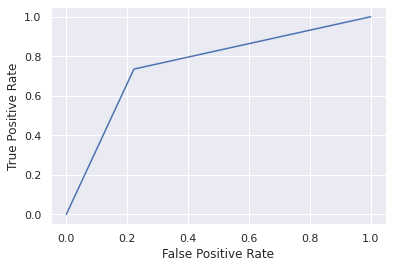

<Figure size 432x288 with 0 Axes>

In [ ]:
#ROC curve for Decision Tree

#define metrics

y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig('/content/DecisionTree_ROC.png')

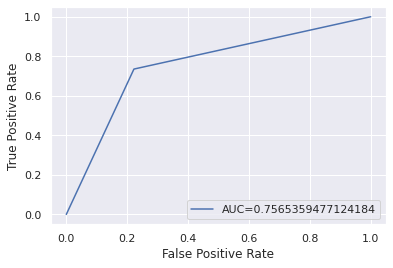

<Figure size 432x288 with 0 Axes>

In [ ]:
# AUC score for Decision Tree

#define metrics
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('/content/DecisionTree_AUC.png')

In [ ]:
# Hyperparameter tuning for the decision tree model using grid search
std_slc = StandardScaler()
pca = decomposition.PCA()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dt)])


In [ ]:
n_components = list(range(1,x.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [ ]:
parameters = dict(pca__n_components=n_components, dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13]})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 2
Best Number Of Components: 1

DecisionTreeClassifier(max_depth=2)


In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(dt, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-04-11 00:06:41] Features: 1/3 -- score: 0.8151815181518152[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-04-11 00:06:41] Features: 2/3 -- score: 0.9933993399339934[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-04-11 00:06:41] Features: 3/3 -- score: 1.0

In [ ]:
sfs1.subsets_

{1: {'avg_score': 0.8151815181518152,
  'cv_scores': array([0.815]),
  'feature_idx': (4,),
  'feature_names': ('chol',)},
 2: {'avg_score': 0.9933993399339934,
  'cv_scores': array([0.993]),
  'feature_idx': (4, 7),
  'feature_names': ('chol', 'thalach')},
 3: {'avg_score': 1.0,
  'cv_scores': array([1.]),
  'feature_idx': (0, 4, 7),
  'feature_names': ('age', 'chol', 'thalach')}}

In [ ]:
feature_names = ('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')
sfs1 = sfs1.fit(x, y, custom_feature_names=feature_names)
sfs1.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-04-11 00:06:42] Features: 1/3 -- score: 0.8151815181518152[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-04-11 00:06:42] Features: 2/3 -- score: 0.9933993399339934[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-04-11 00:06:42] Features: 3/3 -- score: 1.0

{1: {'avg_score': 0.8151815181518152,
  'cv_scores': array([0.815]),
  'feature_idx': (4,),
  'feature_names': ('chol',)},
 2: {'avg_score': 0.9933993399339934,
  'cv_scores': array([0.993]),
  'feature_idx': (4, 7),
  'feature_names': ('chol', 'thalach')},
 3: {'avg_score': 1.0,
  'cv_scores': array([1.]),
  'feature_idx': (0, 4, 7),
  'feature_names': ('age', 'chol', 'thalach')}}

In [ ]:
# Sequential Forward Selection
sfs1 = SFS(dt,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFS
sfs1 = sfs1.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2022-04-11 00:06:42] Features: 1/5 -- score: 0.7689625850340136[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-04-11 00:06:42] Features: 2/5 -- score: 0.7689625850340136[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2022-04-11 00:06:42] Features: 3/5 -- score: 0.7648809523809523[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[5, 6, 8, 11, 12]


In [ ]:
# Build Decision Tree after Sequential Forward Selection
from sklearn.metrics import accuracy_score as acc

dt_sfs = DecisionTreeClassifier()
dt_sfs.fit(x_train.iloc[:, feat_cols], y_train)

y_train_pred = dt_sfs.predict(x_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = dt_sfs.predict(x_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.855
Testing accuracy on selected features: 0.803


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

# Cross validation
rf_accuracy = np.mean(cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy'))
print('Mean accuracy: ', rf_accuracy)

Mean accuracy:  0.8103741496598639


In [ ]:
# Accuracy
rf.score(x_test, y_test)

0.8688524590163934

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

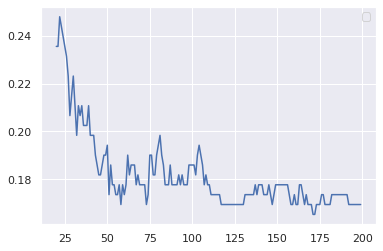

In [ ]:
error_rate = []
n_est = []

for n in range(20, 200):
    rf.set_params(n_estimators=n, oob_score=True, random_state=random_state)
    rf.fit(x_train, y_train)
    
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - rf.oob_score_
    n_est.append(n)
    error_rate.append(oob_error)
    
plt.plot(n_est, error_rate)
plt.legend()
plt.show()

In [ ]:
#defining the grid and implementing the grid search.
model = RandomForestClassifier(class_weight='balanced')
#parameters used in this model
max_depth = [2,10,20]
criterion = ['gini','entropy'] 
#gini- Tests the probability of mis-labeling of any variable in the dataset when randomly marked.
#entropy- shows the disorder of the target's features
min_samples_split = [2,3,5,7,9,10]
max_features = [2,4,6,8,10,12]

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

grid = dict(max_depth = max_depth, criterion = criterion, min_samples_split = min_samples_split, max_features = max_features)
cv = KFold(n_splits = 5) #number of folds used for cross validation

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv,n_jobs = -1)
grid_result = grid_search.fit(x_train, y_train)

In [ ]:
#printing the criterion, max_Depth, max_features and min_samples_split used. 

get_poss= (grid_result.best_score_, grid_result.best_params_)

print("Best possible outcome: %f using %s" % (get_poss))

Best possible outcome: 0.851786 using {'criterion': 'entropy', 'max_depth': 10, 'max_features': 2, 'min_samples_split': 9}


In [ ]:
#best possible outcome predicted- check
#we used classification_Report library for this classification
getres = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 8, min_samples_split = 5)
getres.fit(x_train, y_train)
prediction_rf = getres.predict(x_test)

from sklearn.metrics import classification_report
print('Best estimated Accuracy of the Random Forest is {0}%'.format(round(((accuracy_score(y_test, prediction_rf)*100)),3)))
accuracy_ofrf = accuracy_score(y_test, prediction_rf)
print('-'*50)
print('\n')
print('Model Report:')
print('-'*50)
print(classification_report(y_test, prediction_rf))

Best estimated Accuracy of the Random Forest is 83.607%
--------------------------------------------------


Model Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        27
           1       0.83      0.88      0.86        34

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
pred_model = rf.predict(x_test)

con_matr = confusion_matrix(pred_model, y_test)
print("Printing the Confusion Matrix")
print(con_matr)
print("\n")
print(f'Accuracy of confusion matrix: {accuracy_score(pred_model, y_test)*100} %')

Printing the Confusion Matrix
[[22  5]
 [ 5 29]]


Accuracy of confusion matrix: 83.60655737704919 %


In [ ]:
a = con_matr[0,0]
b = con_matr[0,1]
c = con_matr[1,1]
d = con_matr[1,0]

accuracy  = (c + a) / (c + b + a + d)
precision = c / (c + b)
recall    = c / (c + d)
sensitivity = (c / float(c + d))
specificity = (a / float(a + b))


print(f'Accuracy : {accuracy*100} %')
print()
print('*'*50)
print()

print(f'Precision: {precision*100} %')
print()
print(f'Recall   : {recall*100} %')
print()

print(f'Sensitivity: {sensitivity*100} %')
print()

print(f'Specificity: {specificity*100} %')

Accuracy : 83.60655737704919 %

**************************************************

Precision: 85.29411764705883 %

Recall   : 85.29411764705883 %

Sensitivity: 85.29411764705883 %

Specificity: 81.48148148148148 %


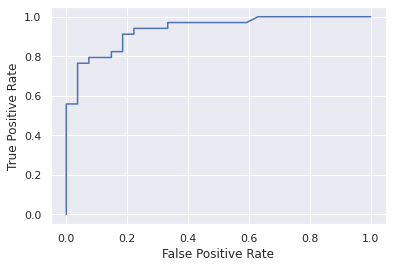

<Figure size 432x288 with 0 Axes>

In [ ]:
# ROC curve for Random Forest

#define metrics

y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig('/content/RandomForest_ROC.png')

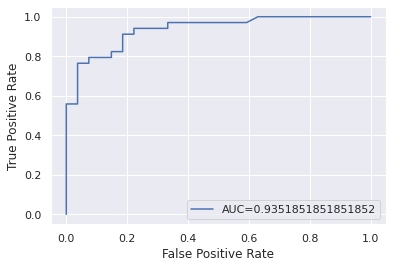

<Figure size 432x288 with 0 Axes>

In [ ]:
# AUC score for Random Forest

#define metrics
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('/content/RandomForest_AUC.png')

In [ ]:
# Feature Selection using Sequential Feature Selection
sfs2 = SFS(rf, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs2 = sfs2.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   15.7s finished

[2022-04-11 00:13:40] Features: 1/3 -- score: 0.8151815181518152[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    9.3s finished

[2022-04-11 00:13:49] Features: 2/3 -- score: 0.9933993399339934[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    6.1s finished

[2022-04-11 00:13:55] Features: 3/3 -- score: 1.0

In [ ]:
sfs2.subsets_

{1: {'avg_score': 0.8151815181518152,
  'cv_scores': array([0.815]),
  'feature_idx': (4,),
  'feature_names': ('chol',)},
 2: {'avg_score': 0.9933993399339934,
  'cv_scores': array([0.993]),
  'feature_idx': (4, 7),
  'feature_names': ('chol', 'thalach')},
 3: {'avg_score': 1.0,
  'cv_scores': array([1.]),
  'feature_idx': (0, 4, 7),
  'feature_names': ('age', 'chol', 'thalach')}}

In [ ]:
feature_names = ('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')
sfs2 = sfs2.fit(x, y, custom_feature_names=feature_names)
sfs2.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   10.2s finished

[2022-04-11 00:14:36] Features: 1/3 -- score: 0.8151815181518152[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    5.6s finished

[2022-04-11 00:14:41] Features: 2/3 -- score: 0.9933993399339934[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    4.8s finished

[2022-04-11 00:14:46] Features: 3/3 -- score: 1.0

{1: {'avg_score': 0.8151815181518152,
  'cv_scores': array([0.815]),
  'feature_idx': (4,),
  'feature_names': ('chol',)},
 2: {'avg_score': 0.9933993399339934,
  'cv_scores': array([0.993]),
  'feature_idx': (4, 7),
  'feature_names': ('chol', 'thalach')},
 3: {'avg_score': 1.0,
  'cv_scores': array([1.]),
  'feature_idx': (0, 4, 7),
  'feature_names': ('age', 'chol', 'thalach')}}

In [ ]:
# Sequential Forward Selection
sfs2 = SFS(rf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFS
sfs2 = sfs2.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   48.6s finished

[2022-04-11 00:16:41] Features: 1/5 -- score: 0.7689625850340136[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   37.7s finished

[2022-04-11 00:17:19] Features: 2/5 -- score: 0.7730442176870749[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   23.2s finished

[2022-04-11 00:17:42] Features: 3/5 -- score: 0.7730442176870749[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
# Which features?
feat_cols = list(sfs2.k_feature_idx_)
print(feat_cols)

[1, 5, 8, 11, 12]


In [ ]:
# Build Random Forest after Sequential Forward Selection

rf_sfs = RandomForestClassifier(n_estimators=1000, random_state=42, max_depth=4)
rf_sfs.fit(x_train.iloc[:, feat_cols], y_train)

y_train_pred = rf_sfs.predict(x_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = rf_sfs.predict(x_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.864
Testing accuracy on selected features: 0.754


In [ ]:
# Naive Bayes
# using classification_Report library for this classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
var_smoothing = np.logspace(0,-9, num=100)

#estimating the best var_smoothing
grid = dict(var_smoothing = var_smoothing)
cv = KFold(n_splits = 5)

grid_search = GridSearchCV(estimator = model, param_grid = grid,n_jobs = -1, cv = cv)
grid_result = grid_search.fit(x_train, y_train)

In [ ]:
print("Best var_smoothing accuracy %f using %s "%(grid_result.best_score_, grid_result.best_params_))

Best var_smoothing accuracy 0.847534 using {'var_smoothing': 6.579332246575683e-05} 


In [ ]:
#following the best var_smoothing predicted
naive_bayes = GaussianNB(var_smoothing = 0.23101297000831597)
naive_bayes.fit(x_train, y_train)
naive_bayes_predict = naive_bayes.predict(x_test)
print('Best estimated Accuracy of the Naive Bayes is {0} %'.format(round(((accuracy_score(y_test, naive_bayes_predict))*100),3)))
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predict)
print('-'*50)
print('\n')
print('Model Report:')
print('-'*50)
print(classification_report(y_test, naive_bayes_predict))

Best estimated Accuracy of the Naive Bayes is 70.492 %
--------------------------------------------------


Model Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.52      0.61        27
           1       0.69      0.85      0.76        34

    accuracy                           0.70        61
   macro avg       0.71      0.69      0.69        61
weighted avg       0.71      0.70      0.69        61



In [ ]:
#using random value of var_smoothing
naive_bayes = GaussianNB(var_smoothing = 0.44342423)
naive_bayes.fit(x_train, y_train)
naive_bayes_predict = naive_bayes.predict(x_test)
print('Best estimated Accuracy of the Naive Bayes is {0} %'.format(round(((accuracy_score(y_test, naive_bayes_predict))*100),3)))
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predict)
print('-'*50)
print('\n')
print('Model Report:')
print('-'*50)
print(classification_report(y_test, naive_bayes_predict))

Best estimated Accuracy of the Naive Bayes is 65.574 %
--------------------------------------------------


Model Report:
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.37      0.49        27
           1       0.64      0.88      0.74        34

    accuracy                           0.66        61
   macro avg       0.68      0.63      0.61        61
weighted avg       0.67      0.66      0.63        61



In [ ]:
pred_model = naive_bayes.predict(x_test)

con_matr = confusion_matrix(pred_model, y_test)
print("Printing the Confusion Matrix")
print(con_matr)
print("\n")
print(f'Accuracy of confusion matrix: {accuracy_score(pred_model, y_test)*100} %')

Printing the Confusion Matrix
[[10  4]
 [17 30]]


Accuracy of confusion matrix: 65.57377049180327 %


In [ ]:
a = con_matr[0,0]
b = con_matr[0,1]
c = con_matr[1,1]
d = con_matr[1,0]

accuracy  = (c + a) / (c + b + a + d)
precision = c / (c + b)
recall    = c / (c + d)
sensitivity = (c / float(c + d))
specificity = (a / float(a + b))

print(f'Accuracy : {accuracy*100} %')
print()
print('*'*50)
print()

print(f'Precision: {precision*100} %')
print()
print(f'Recall   : {recall*100} %')
print()

print(f'Sensitivity: {sensitivity*100} %')
print()

print(f'Specificity: {specificity*100} %')


Accuracy : 65.57377049180327 %

**************************************************

Precision: 88.23529411764706 %

Recall   : 63.829787234042556 %

Sensitivity: 63.829787234042556 %

Specificity: 71.42857142857143 %


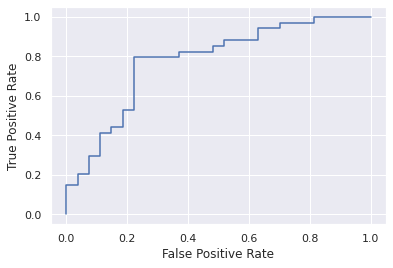

<Figure size 432x288 with 0 Axes>

In [ ]:
# ROC curve for Naive Bayes

#define metrics

y_pred_proba = naive_bayes.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig('/content/NaiveBayes_ROC.png')

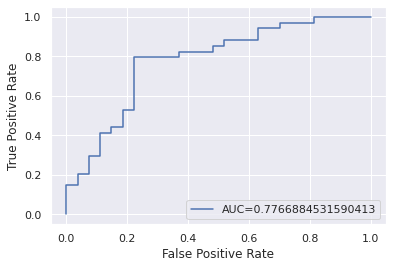

<Figure size 432x288 with 0 Axes>

In [ ]:
# AUC score for Naive Bayes

#define metrics
y_pred_proba = naive_bayes.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
plt.savefig('/content/NaiveBayes_AUC.png')

In [ ]:
# Feature Selection using Sequential Feature Selection
sfs3 = SFS(naive_bayes, 
           k_features=3, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs3 = sfs3.fit(x, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2022-04-11 00:26:38] Features: 1/3 -- score: 0.759075907590759[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-04-11 00:26:38] Features: 2/3 -- score: 0.7722772277227723[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-04-11 00:26:38] Features: 3/3 -- score: 0.7887788778877888

In [ ]:
sfs3.subsets_

{1: {'avg_score': 0.759075907590759,
  'cv_scores': array([0.759]),
  'feature_idx': (2,),
  'feature_names': ('cp',)},
 2: {'avg_score': 0.7722772277227723,
  'cv_scores': array([0.772]),
  'feature_idx': (2, 9),
  'feature_names': ('cp', 'oldpeak')},
 3: {'avg_score': 0.7887788778877888,
  'cv_scores': array([0.789]),
  'feature_idx': (2, 9, 11),
  'feature_names': ('cp', 'oldpeak', 'ca')}}

In [ ]:
feature_names = ('age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal')
sfs3 = sfs3.fit(x, y, custom_feature_names=feature_names)
sfs3.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished

[2022-04-11 00:26:42] Features: 1/3 -- score: 0.759075907590759[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-04-11 00:26:42] Features: 2/3 -- score: 0.7722772277227723[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-04-11 00:26:42] Features: 3/3 -- score: 0.7887788778877888

{1: {'avg_score': 0.759075907590759,
  'cv_scores': array([0.759]),
  'feature_idx': (2,),
  'feature_names': ('cp',)},
 2: {'avg_score': 0.7722772277227723,
  'cv_scores': array([0.772]),
  'feature_idx': (2, 9),
  'feature_names': ('cp', 'oldpeak')},
 3: {'avg_score': 0.7887788778877888,
  'cv_scores': array([0.789]),
  'feature_idx': (2, 9, 11),
  'feature_names': ('cp', 'oldpeak', 'ca')}}

In [ ]:
# Sequential Forward Selection
sfs3 = SFS(naive_bayes,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFS
sfs3 = sfs3.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.4s finished

[2022-04-11 00:27:07] Features: 1/5 -- score: 0.7521258503401361[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2022-04-11 00:27:07] Features: 2/5 -- score: 0.7560374149659864[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2022-04-11 00:27:07] Features: 3/5 -- score: 0.8264455782312925[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [ ]:
# Which features?
feat_cols = list(sfs3.k_feature_idx_)
print(feat_cols)

[2, 5, 6, 11, 12]


In [ ]:
# Build Naive Bayes after Sequential Forward Selection

nb_sfs = GaussianNB()
nb_sfs.fit(x_train.iloc[:, feat_cols], y_train)

y_train_pred = nb_sfs.predict(x_train.iloc[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = nb_sfs.predict(x_test.iloc[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.810
Testing accuracy on selected features: 0.787
